In [1]:
#importing nacessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
#loading the training and test dataset
df_train=pd.read_excel("D:/train_agriculture.xlsx")
df_rt=pd.read_csv('https://raw.githubusercontent.com/RanjitM007/DATASETS/main/Agriculture%20Crop%20Damage/test_pFkWwen.csv')
df_ts=pd.read_csv('https://raw.githubusercontent.com/RanjitM007/DATASETS/main/Agriculture%20Crop%20Damage/train_yaOffsB.csv')
df_test=pd.read_excel("D:/test_agriculture.xlsx")

# Column Name           →   Description

Id                                       UniqueID

Estimated_Insects_Count                  → Estimated insects count per square meter

Crop_Type                                  → Category of Crop(0,1)

Soil_Type                                     →   Category of Soil (0,1)
 
Pesticide_Use_Category                      →  Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)

Number_Doses_Week                           →Number of doses per week

Number_Weeks_Used                          →  Number of weeks used

Number_Weeks_Quit                           → Number of weeks quit

Season                                       →   Season Category (1,2,3)


Crop_Damage                          →Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

In [3]:
#checking the train dataset
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
#checking the shape of  train dataset
df_train.shape

(4599, 10)

Observation:
    
    In our training data set we have 4599 rows and 10 columns.

In [5]:
#checking the dtype of  train dataset
df_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Observation:
    
    1►in our training data set we have 2 types of data i.e. objective and numeric.
    
    2►Numeric are belongs to int and float.

In [6]:
#checking the test dataset
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [7]:
#checking the shape of  test dataset
df_test.shape

(1199, 9)

Observation:

       In our training data set we have 1999 rows and 9 columns.

In [8]:
#checking the dtype of  test dataset
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

Observation:
    
    1►in our training data set we have 2 types of data i.e. objective and numeric.
    
    2►Numeric are belongs to int and float.

In [9]:
#lets concat both the dataset 
df_agr=pd.concat([df_train,df_test],sort=False)
df_agr

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3,NaN
1195,F00003135,1132,0,1,2,40,25.0,3,1,NaN
1196,F00003138,1132,0,1,2,20,13.0,23,1,NaN
1197,F00003149,1212,0,1,2,10,35.0,5,1,NaN


In [10]:
#checking the shape of our final dataframe
df_agr.shape

(5798, 10)

In [11]:
#checking the columns of our final dataset
df_agr.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [12]:
#checking the dtypes of our final dataframe
df_agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [13]:
#checking the info of our final dataset
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 498.3+ KB


In [14]:
#value counts of Crop_Damage
df_agr['Crop_Damage'].value_counts()

0.0    3820
1.0     664
2.0     115
Name: Crop_Damage, dtype: int64

observatiOn:
    
    In this dataset we have Alive crop 3820.
    
                            Damage by other causes 664
                              due to pesticides 115
    

In [15]:
#replace the crop damages values 0=Alive,1=other cause,2=pesticides
df_agr['Crop_Damage']=df_agr["Crop_Damage"].replace({0.0:"Alive",1.0:"Other Cause",2.0:"pesticides"})
                                                    
df_agr['Crop_Damage'].value_counts()

Alive          3820
Other Cause     664
pesticides      115
Name: Crop_Damage, dtype: int64

In [16]:
df_agr['Crop_Damage'].dtypes

dtype('O')

In [17]:
df_agr['Season'].value_counts()

2    2946
1    1740
3    1112
Name: Season, dtype: int64

In [18]:
#lets replace the season values with 1=summer,2=rain,3=winter
df_agr['Season']=df_agr["Season"].replace({1:"Rain",2:"Winter",3:"Summer"})
                                                    
df_agr['Season'].value_counts()

Winter    2946
Rain      1740
Summer    1112
Name: Season, dtype: int64

Observation:
    
   most of the harvest are happening in Winter Seasons 

In [19]:
#checking the null values
df_agr.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

Observation :
    
    we have some null values in Number_Weeks_Used and Crop_Damage.

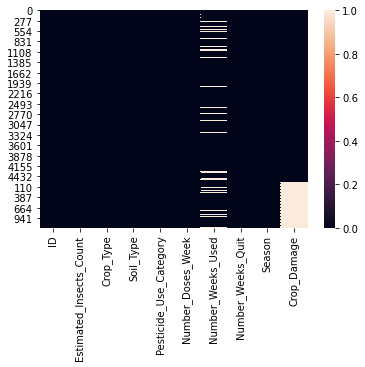

In [20]:
#for better visualization lets plot with heatmap
sns.heatmap(df_agr.isnull())

Observation :

we have some null values in Number_Weeks_Used and Crop_Damage.

In [21]:
#filling the null values
col_to_impute=["Number_Weeks_Used","Crop_Damage"]
for col in col_to_impute:
    if df_agr[col].dtype!="object":
        df_agr[col].fillna(df_agr[col].mean(),inplace=True)
    else:
        df_agr[col].fillna(df_agr[col].mode()[0],inplace=True)

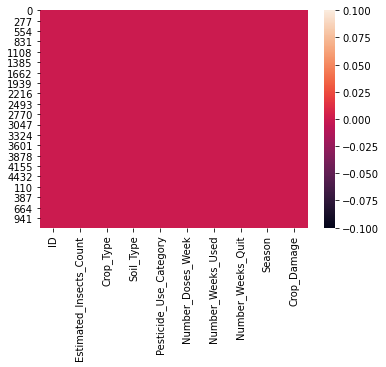

In [22]:
#Again checking the null values with heatmap 
sns.heatmap(df_agr.isnull())

Observation:
    
    Now in Above plot we ave only one color so now  there is no null values are present  in our dataset.

In [23]:
#lets drop the useless columns
df_agr.drop('ID',axis=1,inplace=True)
df_agr.shape

(5798, 9)

# Statistic Summary

In [24]:
#describe the Dataset
df_agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262
std,821.330403,0.413280,0.499271,0.484594,15.655508,11.999136,9.582781
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.920374,6.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000


Observation:
    
    1►Highest Standard Deviation is in Estimated_Insects_Count.
    
    2►Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used and Number_Weeks_Quit inside these columns 
    huge difference from 75% values to maximum values,may be some outliers are present inside these columns


# Correlation

In [25]:
#checking the correlation of the dataset
cor=df_agr.corr()
cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.441158,0.228822
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.010653,-0.290973
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.103188,-0.062686
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.375475,-0.574041
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.104705,-0.024209
Number_Weeks_Used,0.441158,0.010653,-0.103188,0.375475,0.104705,1.000000,-0.428203
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.428203,1.000000


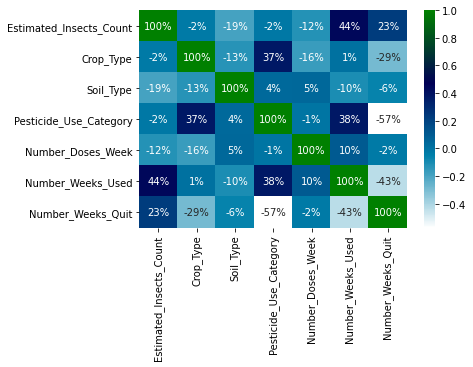

In [26]:
#for better visualization lets plot with heat map
sns.heatmap(cor,annot=True,fmt=".0%",cmap="ocean_r")

# Outliers

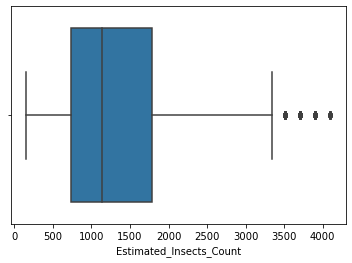

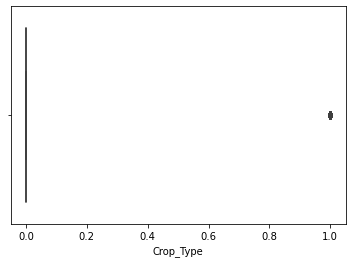

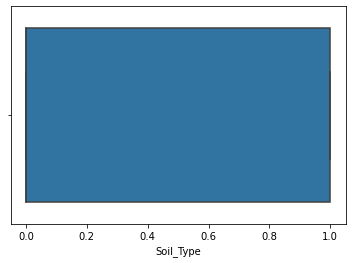

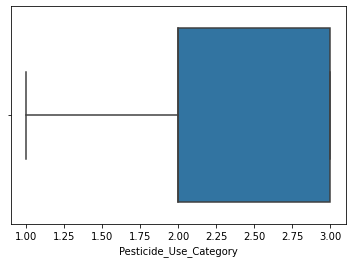

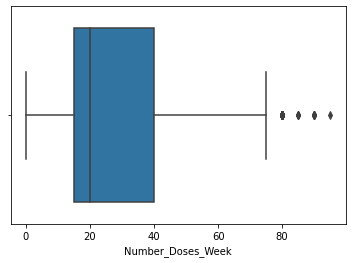

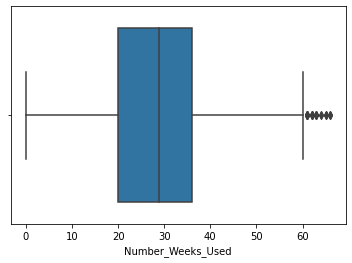

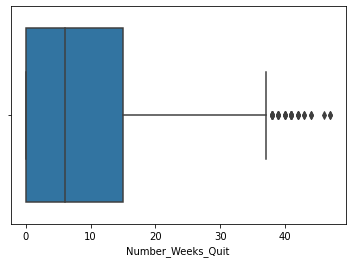

In [27]:
d=df_agr.columns
for i in d:
    if df_agr[i].dtypes!='object':
        sns.boxplot(df_agr[i])
        plt.show()

Observation:
    
    1►Pesticide_Use_Category is negetivly correlated with Number_weeks _Quit.
    

# Univariate Analysis

# Estimated_Insects_Count

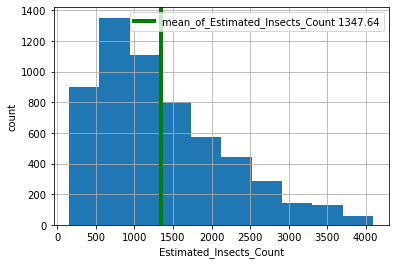

In [28]:
#checking the mean of Estimated_Insects_Count cases with histplot
df_agr["Estimated_Insects_Count"].hist()
m=df_agr["Estimated_Insects_Count"].mean()
plt.axvline(m,linewidth=4,color='green',label=('mean_of_Estimated_Insects_Count %0.2f'%m))
plt.xlabel("Estimated_Insects_Count")
plt.ylabel("count")
plt.legend()

Observation:
    
    The mean of Estimated_Insects_Count is 1347.64

# Crop_Type

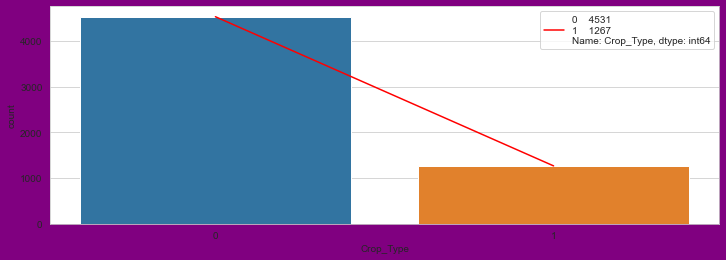

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=[12,4],facecolor="purple")
c=df_agr["Crop_Type"].value_counts()
sns.countplot(x='Crop_Type',data=df_agr)
plt.plot(c,color='red',label=c)
plt.xlabel("Crop_Type")
plt.ylabel("count")
plt.legend()
plt.show()

Observation:
    
    The Crop_Type of 0 is have the more records.

# Soil_Type

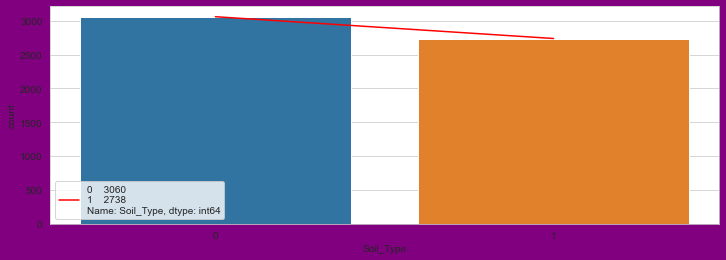

In [30]:
plt.figure(figsize=[12,4],facecolor="purple")
c=df_agr["Soil_Type"].value_counts()
sns.countplot(x='Soil_Type',data=df_agr)
plt.plot(c,color='red',label=c)
plt.xlabel("Soil_Type")
plt.ylabel("count")
plt.legend()
plt.show()

Observation:
    
    here Fertile Soil_Type is have the more observation.

# Pesticide_Use_Category

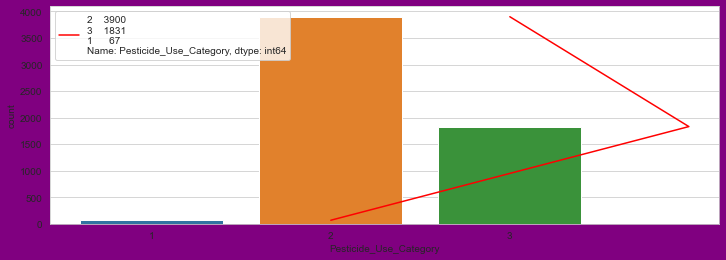

In [31]:
plt.figure(figsize=[12,4],facecolor="purple")
c=df_agr["Pesticide_Use_Category"].value_counts()
sns.countplot(x='Pesticide_Use_Category',data=df_agr)
plt.plot(c,color='red',label=c)
plt.xlabel("Pesticide_Use_Category")
plt.ylabel("count")
plt.legend()
plt.show()

Observation:
    
    Most o the cases  the Pesticide is  Previously Used in the soil.

# Number_Doses_Week

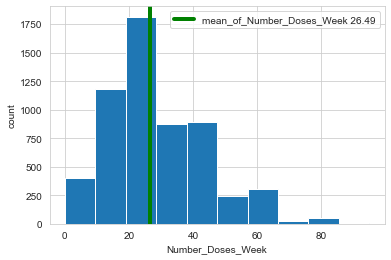

In [32]:
#checking the mean of Number_Doses_Week cases with histplot
df_agr["Number_Doses_Week"].hist()
m=df_agr["Number_Doses_Week"].mean()
plt.axvline(m,linewidth=4,color='green',label=('mean_of_Number_Doses_Week %0.2f'%m))
plt.xlabel("Number_Doses_Week")
plt.ylabel("count")
plt.legend()

Observation:

The mean of Number_Doses_Week is 26.49         .

# Number_Weeks_Used

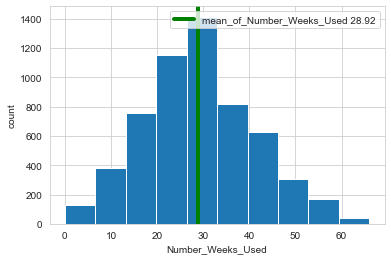

In [33]:
#checking the mean of Number_Weeks_Used with histplot
df_agr["Number_Weeks_Used"].hist()
m=df_agr["Number_Weeks_Used"].mean()
plt.axvline(m,linewidth=4,color='green',label=('mean_of_Number_Weeks_Used %0.2f'%m))
plt.xlabel("Number_Weeks_Used")
plt.ylabel("count")
plt.legend()

Observation:

The mean of Number_Weeks_Used is 28.92 .

# Number_Weeks_Quit

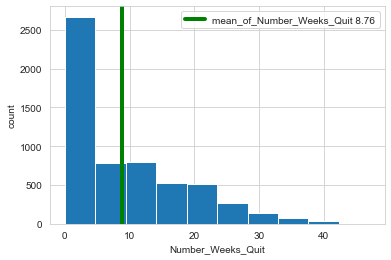

In [34]:
#checking the mean of Number_Weeks_Quit with histplot
df_agr["Number_Weeks_Quit"].hist()
m=df_agr["Number_Weeks_Quit"].mean()
plt.axvline(m,linewidth=4,color='green',label=('mean_of_Number_Weeks_Quit %0.2f'%m))
plt.xlabel("Number_Weeks_Quit")
plt.ylabel("count")
plt.legend()

Observation:

The mean of Number_Weeks_Quit is 8.76 .

# Season

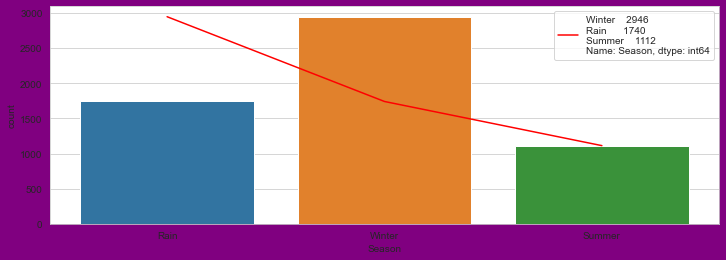

In [35]:
plt.figure(figsize=[12,4],facecolor="purple")
c=df_agr["Season"].value_counts()
sns.countplot(x='Season',data=df_agr)
plt.plot(c,color='red',label=c)
plt.xlabel("Season")
plt.ylabel("count")
plt.legend()
plt.show()

Observation:
     2946 times the harvest are happrning in Winter Seasons

# Crop_Damage

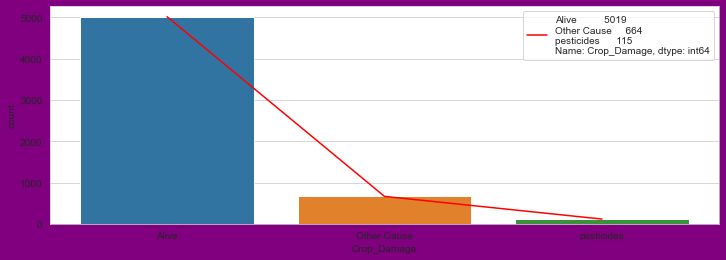

In [36]:
plt.figure(figsize=[12,4],facecolor="purple")
c=df_agr["Crop_Damage"].value_counts()
sns.countplot(x='Crop_Damage',data=df_agr)
plt.plot(c,color='red',label=c)
plt.xlabel("Crop_Damage")
plt.ylabel("count")
plt.legend()
plt.show()

Observation: 
    5019 times thecorp are not damaged they are alive.

# Bivariate analysis

# Estimated_Insects_Count vs Crop_Damage

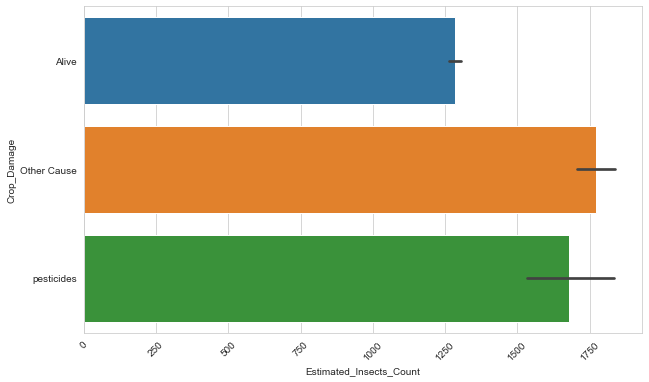

In [37]:
plt.figure(figsize=[10,6])
sns.barplot(x="Estimated_Insects_Count",y="Crop_Damage",data=df_agr)
plt.xticks(rotation = 45)
plt.show()

Observation:
    
    When the Estimated_Insects_Count is 1251 ,most of the corp are alive.
    
    when the Estimated_Insects_Count is 1750 ,Highest number of Corp are damage for Other cause. 

# Crop_Type vs Crop_Damage

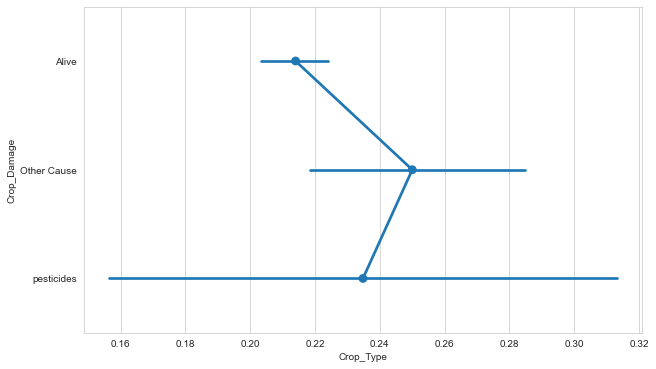

In [38]:
plt.figure(figsize=[10,6])
sns.pointplot(x="Crop_Type",y="Crop_Damage",data=df_agr)
plt.show()

Observation:
    
    When the Crop_Type is between 0.20 to 0.22

# Soil_Type vs Crop_Damage

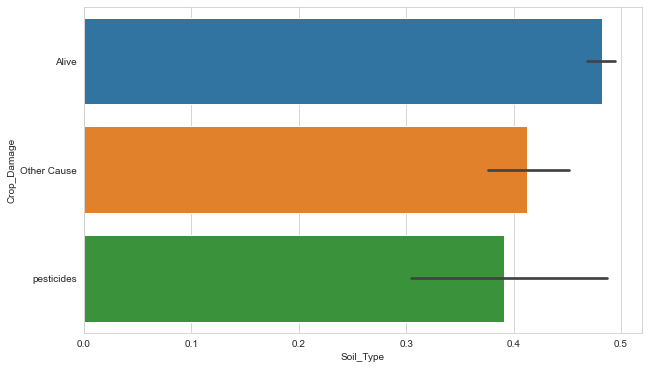

In [39]:
plt.figure(figsize=[10,6])
sns.barplot(x="Soil_Type",y="Crop_Damage",data=df_agr)
plt.show()

Observation:
    When the soil Fertile is 1 or below 1 then maximum time the corp Alive .

# Pesticide_Use_Category vs Crop_Damage

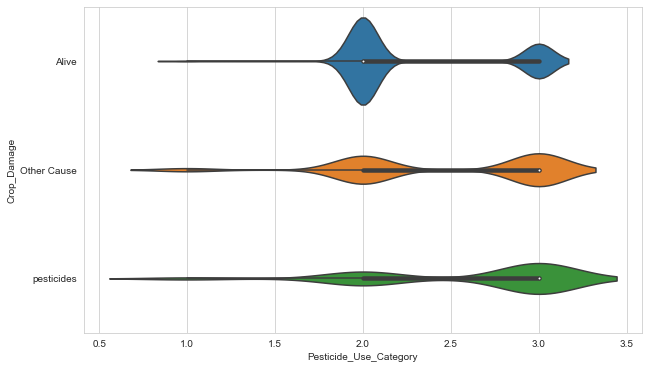

In [40]:
plt.figure(figsize=[10,6])
sns.violinplot(x="Pesticide_Use_Category",y="Crop_Damage",data=df_agr)
plt.show()

Observation:
    
    When the Pesticide_Use_Category is Previously Used on that time maximum crop are alive.

# Number_Doses_Week vs Crop_Damage

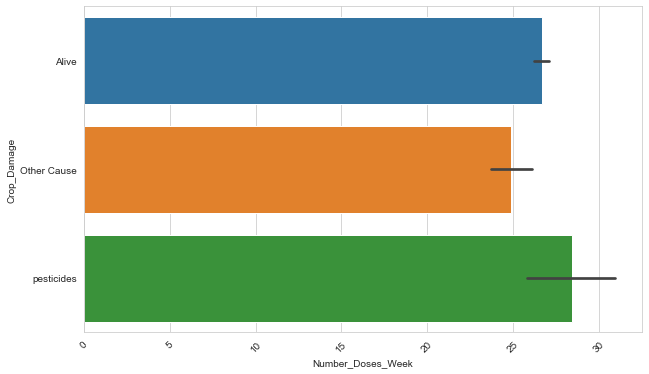

In [41]:
plt.figure(figsize=[10,6])
sns.barplot(x="Number_Doses_Week",y="Crop_Damage",data=df_agr)
plt.xticks(rotation = 45)
plt.show()

Observation:
    
    When the 26 times _Doses_Week,most of the Crop are alive.
    
    When the 28 times _Doses_Week,most of the Crop are damage due to Pesticides.
    

# Number_Weeks_Used vs Crop_Damage


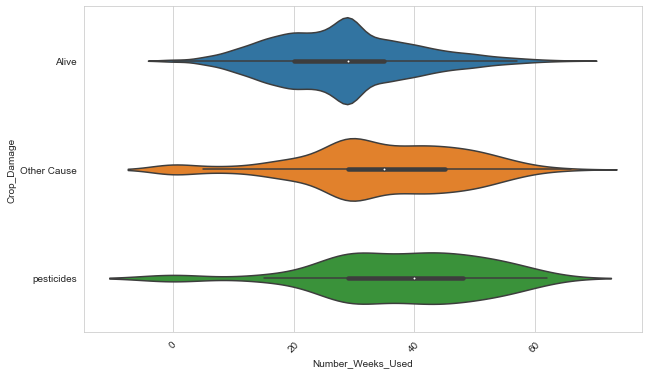

In [42]:
plt.figure(figsize=[10,6])
sns.violinplot(x="Number_Weeks_Used",y="Crop_Damage",data=df_agr)
plt.xticks(rotation = 45)
plt.show()

Observation:

     When 25 weeks used,crop are alive.
    
    When more than 25 Number of weeks used then crop are Damaged.

# Number_Weeks_Quit vs Crop_Damage


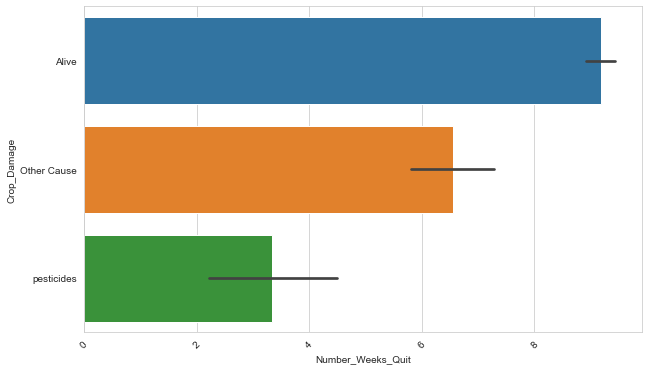

In [43]:
plt.figure(figsize=[10,6])
sns.barplot(x="Number_Weeks_Quit",y="Crop_Damage",data=df_agr)
plt.xticks(rotation = 45)
plt.show()

Observation:
    When the Number_Weeks_Quit is more than 7 weeks all crop are alive.

# Season vs Crop_Damage


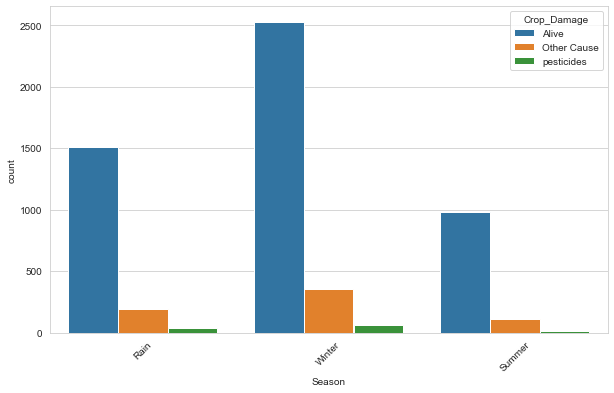

In [44]:
plt.figure(figsize=[10,6])
sns.countplot(x="Season",hue="Crop_Damage",data=df_agr)
plt.xticks(rotation = 45)
plt.show()

Observation:
    
    2500 crop are alive in winter season.
    
    1500 crop are alive in Rain season.
    
    1000 crop are alive in Summer Season.

# Multivariate Analysis

Text(0.5, 1.0, 'Crop_Type Each season by Crop♣Damage')

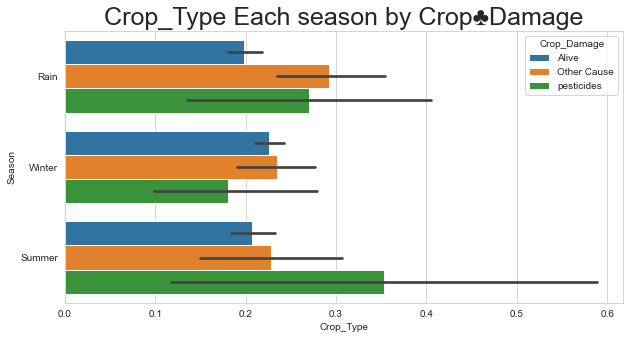

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='Crop_Type',y='Season',data=df_agr, hue='Crop_Damage')
plt.title("Crop_Type Each season by Crop♣Damage",{"fontsize":25})

Observation:
    
    1►Winter season when the Crop type is 0.2 then the crop are alive.
    
    2►Summer seasson When the crop type is more than 0.3 then the crop is damaged by pesicides.

Text(0.5, 1.0, 'soil_Type Each season by Crop♣Damage')

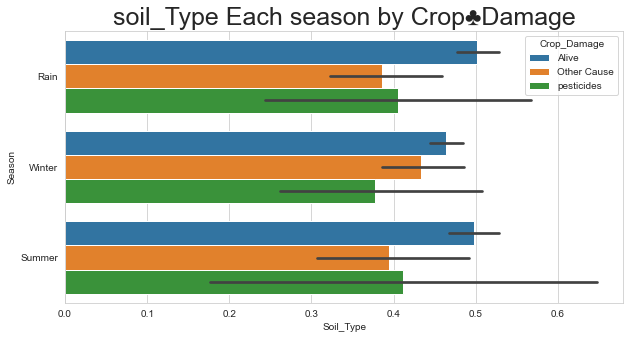

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Soil_Type',y='Season',data=df_agr, hue='Crop_Damage')
plt.title("soil_Type Each season by Crop♣Damage",{"fontsize":25})

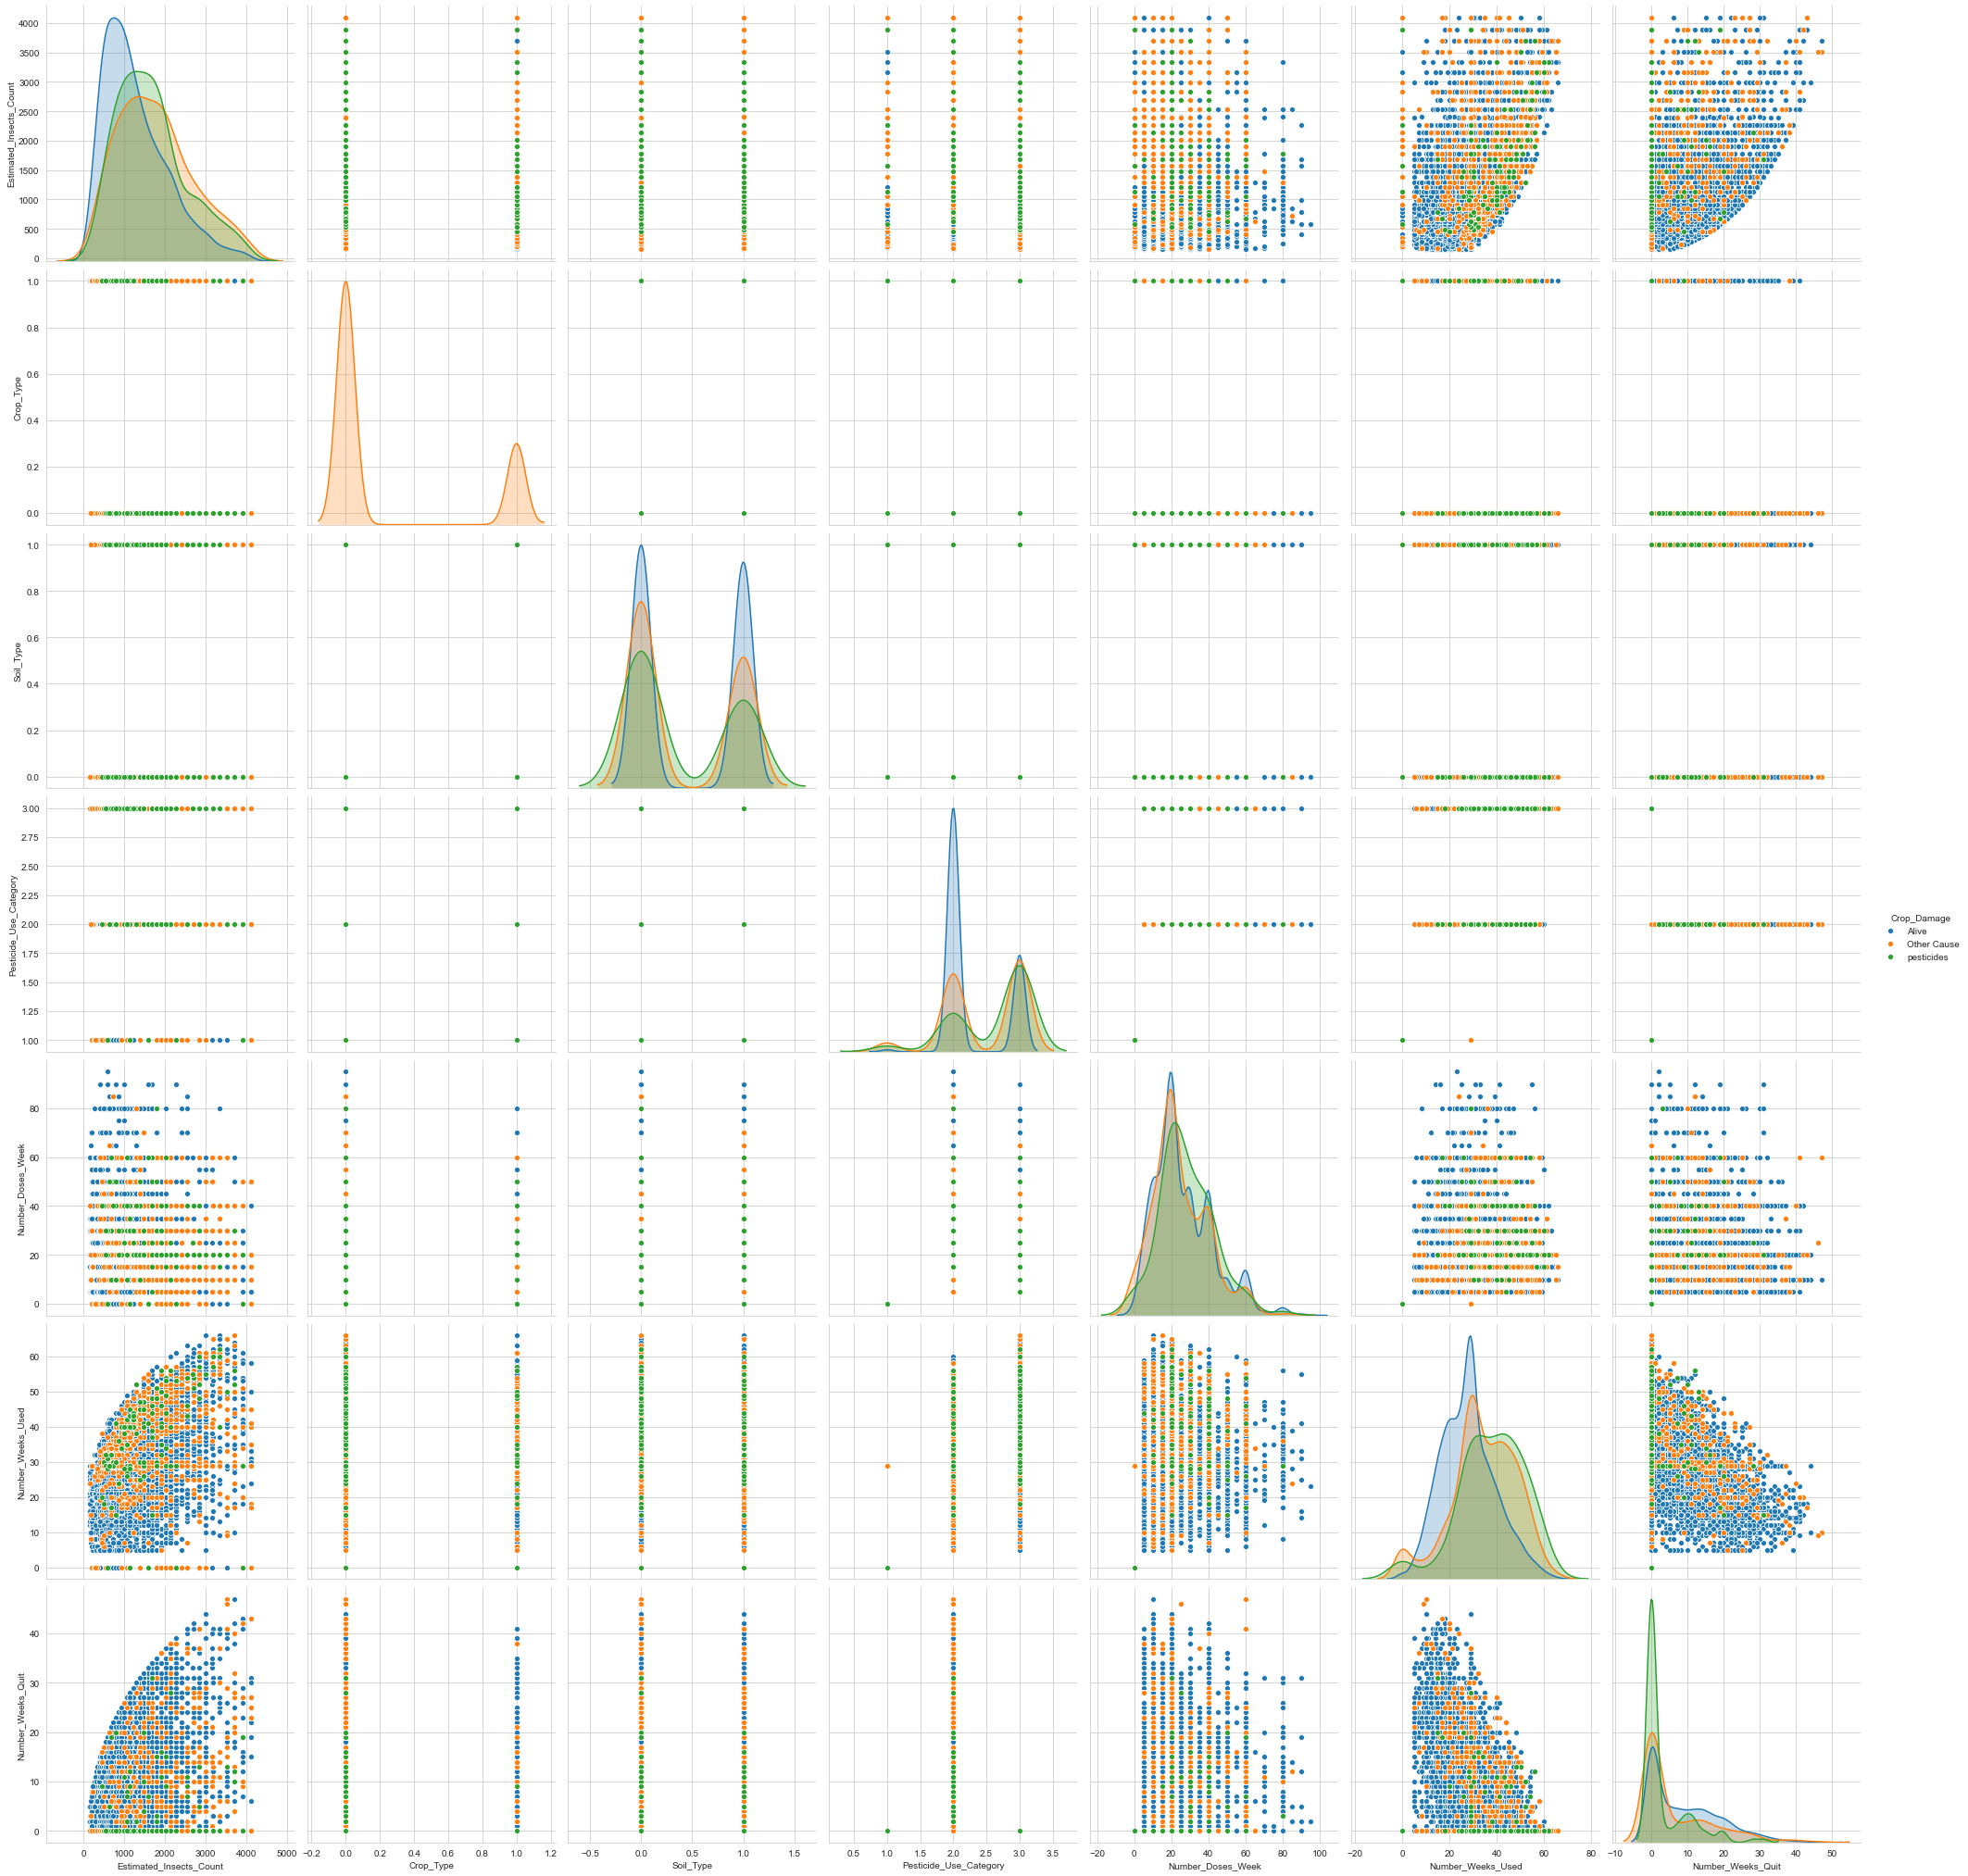

In [47]:
sns.pairplot(df_agr,hue='Crop_Damage',size=4)

# Skewness

In [48]:
df_agr.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.266335
Number_Weeks_Quit          0.972163
dtype: float64

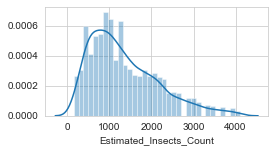

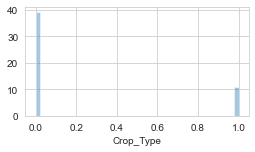

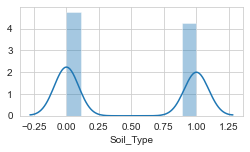

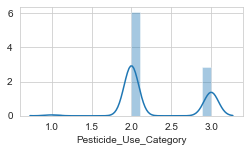

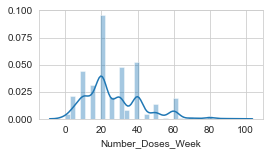

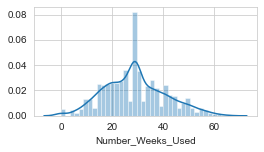

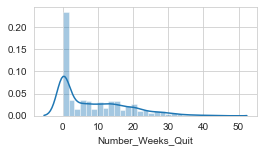

In [49]:
#lets plot the distplot for looking the skewness
for i in df_agr.describe().columns:
    if df_agr[i].dtypes!="object":
        plt.figure(figsize=[4,2])
        sns.distplot(df_agr[i])
        plt.show()

Observation:
    in Estimated_Insects_Count and Number_Weeks_Quit skewed data is there.

# Data Preprocessing

In [50]:
#coverting the object dtype to numeric with label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_agr.columns
for i in d:
    if df_agr[i].dtypes=='object':
        df_agr[i]=l.fit_transform(df_agr[i])

# Outliers

In [51]:
#removing outliers with zscore
from scipy.stats import zscore
z=np.abs(zscore(df_agr))
df_agr_final=df_agr[(z<3).all(axis=1)]
print(df_agr.shape,df_agr_final.shape)

(5798, 9) (5528, 9)


In [52]:
#split the input and out put variable.
df_x=df_agr_final.drop(columns="Crop_Damage",axis=1)
y=df_agr_final[["Crop_Damage"]]
print(df_x.shape,y.shape)
y

(5528, 8) (5528, 1)


,Crop_Damage
0,0
1,1
2,1
3,1
4,1
...,...
1194,0
1195,0
1196,0
1197,0


# Data Standardize

In [53]:
#scalling the data with standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [70]:
#In this data set we know that out target variable Crop_Damage is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
def max_acc(rgr,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        rgr.fit(x_train,y_train)
        y_prd=rgr.predict(x_test)
        rc=accuracy_score(y_test,y_prd)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc*100)

In [71]:
#lets start with logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc(lg,x,y)

max accuracy_ score coressponding to ♣♣→ 61 is♣♣ 90.23508137432188


In [72]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score   
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())

In [73]:
k(lg,x,y)

mean accuracy score for  LogisticRegression() 0.8786179866299003
Standard deviation  in accuracy score for  LogisticRegression() 0.005286016009891518

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.8786179866299003


In [94]:
def PLT(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc*100)
    cm=confusion_matrix(y_test,pre)
    print()
    print()
    sns.heatmap(cm,annot=True)
    plt.show()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

90.23508137432188




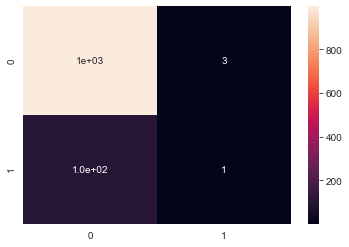




              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1000
           1       0.25      0.01      0.02       106

    accuracy                           0.90      1106
   macro avg       0.58      0.50      0.48      1106
weighted avg       0.84      0.90      0.86      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [95]:
PLT(lg,x,y,61)

In [60]:
#lets go with support vector classifier
from sklearn.svm import SVC
from sklearn.model_selection import *
svc=SVC()
parameters={"kernel":["poly","rbf","linear"],"C":[0.0001,0.001,0.01,0.1,1]}
Gs=GridSearchCV(svc,parameters,cv=5,scoring="accuracy")
Gs.fit(x,y)
Gs.best_params_#finding the best parameters with Gridsearchcv

{'C': 0.0001, 'kernel': 'poly'}

In [76]:
#finding the best random state foe best accuracy
sv=SVC(C=0.0001,kernel="poly")
max_acc(sv,x,y)

max accuracy_ score coressponding to ♣♣→ 61 is♣♣ 90.41591320072332


90.41591320072332




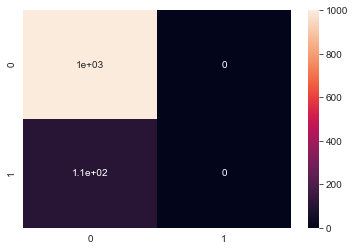




              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1000
           1       0.00      0.00      0.00       106

    accuracy                           0.90      1106
   macro avg       0.45      0.50      0.47      1106
weighted avg       0.82      0.90      0.86      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [96]:
PLT(sv,x,y,61)

In [78]:
k(sv,x,y)

mean accuracy score for  SVC(C=0.0001, kernel='poly') 0.884768559809513
Standard deviation  in accuracy score for  SVC(C=0.0001, kernel='poly') 0.0004107629605843867

******************************************************
After seen the cross validation score of SVC(C=0.0001, kernel='poly') the accuracy score mean is 0.884768559809513


In [62]:
#lets take the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={"n_jobs":range(1,30),"n_neighbors":range(0,50)}
Gk=GridSearchCV(kn,parameters,cv=5,scoring="accuracy")
Gk.fit(x,y)
Gk.best_params_#finding the best hyperparameter with Gridsearchcv

{'n_jobs': 1, 'n_neighbors': 48}

In [80]:
#we saw that on above GridSearchCv  result that n_neighbors= 48 which one is a even  number,we'll take a odd nuber i.e 49 for better result.
knn=KNeighborsClassifier(n_jobs=1,n_neighbors=49)
max_acc(knn,x,y)

max accuracy_ score coressponding to ♣♣→ 61 is♣♣ 90.50632911392405


In [64]:
k(knn,x,y)

mean accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=99) 0.8844065688592867
Standard deviation  in accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=99) 0.0006900568454872372

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_jobs=1, n_neighbors=99) the accuracy score mean is 0.8844065688592867


90.50632911392405




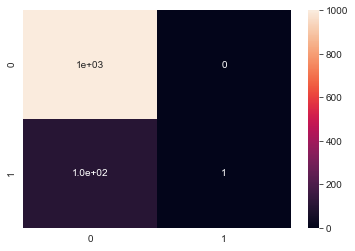




              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1000
           1       1.00      0.01      0.02       106

    accuracy                           0.91      1106
   macro avg       0.95      0.50      0.48      1106
weighted avg       0.91      0.91      0.86      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [97]:
PLT(knn,x,y,61)

In [65]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

parameters={'n_estimators':range(1,1000,49)}
gr=GridSearchCV(r,parameters,cv=5,scoring='accuracy')
gr.fit(x,y)
gr.best_params_

{'n_estimators': 295}

In [83]:
r=RandomForestClassifier(n_estimators=295)
max_acc(r,x,y)

max accuracy_ score coressponding to ♣♣→ 62 is♣♣ 89.5117540687161


In [84]:
k(r,x,y)

mean accuracy score for  RandomForestClassifier(n_estimators=295) 0.8464184661206253
Standard deviation  in accuracy score for  RandomForestClassifier(n_estimators=295) 0.01774706741899229

******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=295) the accuracy score mean is 0.8464184661206253


89.60216998191682




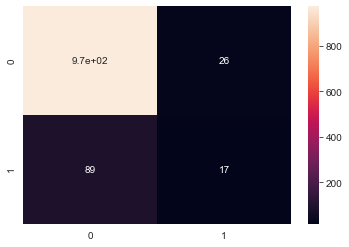




              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1000
           1       0.40      0.16      0.23       106

    accuracy                           0.90      1106
   macro avg       0.66      0.57      0.59      1106
weighted avg       0.87      0.90      0.88      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [98]:
PLT(r,x,y,62)

In [86]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_acc(dc,x,y)

max accuracy_ score coressponding to ♣♣→ 42 is♣♣ 82.45931283905968


In [99]:
k(dc,x,y)

mean accuracy score for  DecisionTreeClassifier() 0.7675509152054201
Standard deviation  in accuracy score for  DecisionTreeClassifier() 0.02536956159786737

******************************************************
After seen the cross validation score of DecisionTreeClassifier() the accuracy score mean is 0.7675509152054201


81.28390596745028




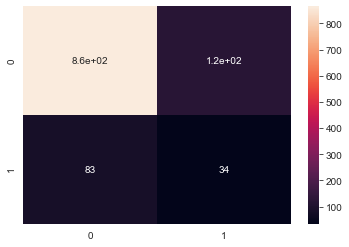




              precision    recall  f1-score   support

           0       0.91      0.87      0.89       989
           1       0.22      0.29      0.25       117

    accuracy                           0.81      1106
   macro avg       0.56      0.58      0.57      1106
weighted avg       0.84      0.81      0.82      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [100]:
PLT(dc,x,y,42)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
g=GradientBoostingClassifier()
parameters={"loss":["deviance","exponential"],"learning_rate":[0.001,0.01,0.1,1.0],
           "n_estimators":range(0,1000,100)}
gg=GridSearchCV(g,parameters,cv=5,scoring="accuracy")
gg.fit(x,y)
gg.best_params_

{'learning_rate': 0.001, 'loss': 'deviance', 'n_estimators': 100}

In [101]:
g=GradientBoostingClassifier(learning_rate=0.001,loss='deviance',n_estimators=100)
max_acc(g,x,y)

max accuracy_ score coressponding to ♣♣→ 61 is♣♣ 90.41591320072332


In [102]:
k(g,x,y)

mean accuracy score for  GradientBoostingClassifier(learning_rate=0.001) 0.884768559809513
Standard deviation  in accuracy score for  GradientBoostingClassifier(learning_rate=0.001) 0.0004107629605843867

******************************************************
After seen the cross validation score of GradientBoostingClassifier(learning_rate=0.001) the accuracy score mean is 0.884768559809513


90.41591320072332




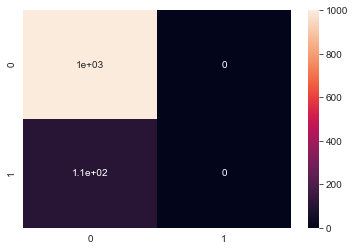




              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1000
           1       0.00      0.00      0.00       106

    accuracy                           0.90      1106
   macro avg       0.45      0.50      0.47      1106
weighted avg       0.82      0.90      0.86      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [103]:
PLT(g,x,y,61)

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
max_acc(ex,x,y)

max accuracy_ score coressponding to ♣♣→ 62 is♣♣ 88.96925858951175


In [105]:
k(ex,x,y)

mean accuracy score for  ExtraTreesClassifier() 0.8395439110405605
Standard deviation  in accuracy score for  ExtraTreesClassifier() 0.015041010907426246

******************************************************
After seen the cross validation score of ExtraTreesClassifier() the accuracy score mean is 0.8395439110405605


85.623869801085




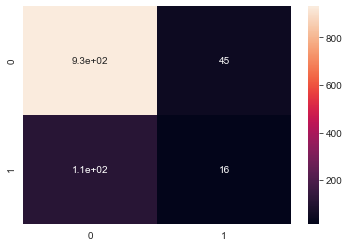




              precision    recall  f1-score   support

           0       0.89      0.95      0.92       976
           1       0.26      0.12      0.17       130

    accuracy                           0.86      1106
   macro avg       0.58      0.54      0.54      1106
weighted avg       0.82      0.86      0.83      1106
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [106]:
PLT(ex,x,y,68)

In [116]:
#After seen above results am going with KNeighborsClassifier its performing well in this dataset.
#with the random state of 61
knn=KNeighborsClassifier(n_jobs=1,n_neighbors=49)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=0.20)
knn.fit(x_train,y_train)
y_prd=knn.predict(x_test)
acc=accuracy_score(y_test,y_prd)
print("accuracy_score",acc*100)
print()
print()
print("CONFUSION_MATRIX OF KNeighborsClassifier  →","\n",confusion_matrix(y_test,y_prd))
print()
print("classification_reportOF KNeighborsClassifier"  ,"\n",
      classification_report(y_test,y_prd))

accuracy_score 90.50632911392405


CONFUSION_MATRIX OF KNeighborsClassifier  → 
 [[1000    0]
 [ 105    1]]

classification_reportOF KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1000
           1       1.00      0.01      0.02       106

    accuracy                           0.91      1106
   macro avg       0.95      0.50      0.48      1106
weighted avg       0.91      0.91      0.86      1106



In [117]:
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(knn,'CROP_DAMAGE_KNN.pkl')

['CROP_DAMAGE_KNN.pkl']

In [118]:
#saving the predict as csv
joblib.dump(knn,'CROP_DAMAGE_KNN.csv')

['CROP_DAMAGE_KNN.csv']

In [119]:
#lets call the model and predict it
Model=joblib.load('CROP_DAMAGE_KNN.csv')
Model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])